## Data Description: 

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries.The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this case study we have considered data from year 2000-2015 for 193 countries for further analysis. Dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

Variables:

Country- Country

Year- Year

Status- Developed or Developing status

Life Expectancy- Age(years)

Adult Mortality- Adult Mortality Rates of both sexes(probability of dying between 15&60 years per 1000 population)

Infant Deaths- Number of Infant Deaths per 1000 population

Alcohol- Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

Percent Expenditure- Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hep B- Hepatitis B (HepB) immunization coverage among 1-year-olds(%)

Measles- number of reported measles cases per 1000 population

BMI- Average Body Mass Index of entire population

U-5 Deaths- Number of under-five deaths per 1000 population

Polio- Polio(Pol3) immunization coverage among 1-year-olds(%)

Total Expenditure- General government expenditure on health as a percentage of total government expenditure(%)

Diphtheria- Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds(%)

HIV/AIDS- Deaths per 1000 live births HIV/AIDS(0-4 years)

GDP- Gross Domestic Product per capita(in USD)

Population- Population Thinness 10-19- Prevalence of thinness among children and adolescents for Age 10 to 19(%)

Thinness 5-9- Prevalence of thinness among children for Age 5 to 9(%)

Income Composition- Human Development Index in terms of income composition of resources(0-1)

Schooling- Number of years of Schooling 

Dataset found at:https://www.kaggle.com/kumarajarshi/life-expectancy-who

## Problem statement

Bulid a multilinear regression model using sklean to predict the life expectancy agaist the relevant repsonse varaibles


Activities :
1. Missing Value Treatment and outliers
2. Explore the relationship between the Life expectancy varaible and the repsonse variables
3. Feature selection
4. Multi linerar regression model


### <font color='green'>Import required libraries</font>
### <font color='green'>In placed of get_ipython().run_line_magic('matplotlib', 'inline') we can use "%matplotlib inline"</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sb

lifexp_df= pd.read_csv("https://gitlab.com/jchauhan1984/life_expectancy_data/-/raw/main/Life_Expectancy_Data.csv")

In [2]:
lifexp_df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

### <font color='green'>Checking the shape of the dataframe</font>

In [3]:
lifexp_df.shape

(2938, 22)

### <font color='green'>Printing the columns of the dataframe</font>

In [4]:
lifexp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### <font color='green'>Renaming the columns</font>

In [5]:
# Renaming the columns
lifexp_df.rename(columns={'Life expectancy ':'Life_Expectancy', 'Adult Mortality':'Adult_Mortality','infant deaths':'Infant_Deaths','percentage expenditure':'Percentage_Exp', 'Hepatitis B':'Hepatitis_B', 'Measles ':'Measles', ' BMI ':'BMI',
                          'under-five deaths ':'under_five_deaths', 'Total expenditure':'Total_Exp','Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV/AIDS',
                          ' thinness  1-19 years':'thinness_1_to_19', ' thinness 5-9 years':'thinness_5_to_9', 'Income composition of resources':'Income_Composition'}, inplace=True)

### <font color='green'>Checking the null values count columnwise</font>

In [6]:
# Checking for NULL values in the dataset 

lifexp_df.isna().sum()

Country                 0
Year                    0
Status                  0
Life_Expectancy        10
Adult_Mortality        10
Infant_Deaths           0
Alcohol               194
Percentage_Exp          0
Hepatitis_B           553
Measles                 0
BMI                    34
under_five_deaths       0
Polio                  19
Total_Exp             226
Diphtheria             19
HIV/AIDS                0
GDP                   448
Population            652
thinness_1_to_19       34
thinness_5_to_9        34
Income_Composition    167
Schooling             163
dtype: int64

### <font color='violet'>As we can see above that null values count is for numerical columns only</font>

### <font color='green'>Replacing the blank value with NaN</font>

In [7]:
# Missing Value Treatment #Relaplcing blank cells with the value NaN
lifexp_df.replace(" ", np.NaN, inplace = True)

### <font color='green'>Replacing the NaN with mean for the numerical columns</font>

In [8]:
lifexp_df['Life_Expectancy'] = lifexp_df['Life_Expectancy'].fillna(lifexp_df['Life_Expectancy'].mean())
lifexp_df['Adult_Mortality'] = lifexp_df['Adult_Mortality'].fillna(lifexp_df['Adult_Mortality'].mean())
lifexp_df['Alcohol'] = lifexp_df['Alcohol'].fillna(lifexp_df['Alcohol'].mean())
lifexp_df['Hepatitis_B'] = lifexp_df['Hepatitis_B'].fillna(lifexp_df['Hepatitis_B'].mean())
lifexp_df['BMI'] = lifexp_df['BMI'].fillna(lifexp_df['BMI'].mean())
lifexp_df['Total_Exp'] = lifexp_df['Total_Exp'].fillna(lifexp_df['Total_Exp'].mean())
lifexp_df['Polio'] = lifexp_df['Polio'].fillna(lifexp_df['Polio'].mean())
lifexp_df['Diphtheria'] = lifexp_df['Diphtheria'].fillna(lifexp_df['Diphtheria'].mean())
lifexp_df['GDP'] = lifexp_df['GDP'].fillna(lifexp_df['GDP'].mean())
lifexp_df['Population'] = lifexp_df['Population'].fillna(lifexp_df['Population'].mean())
lifexp_df['thinness_1_to_19'] = lifexp_df['thinness_1_to_19'].fillna(lifexp_df['thinness_1_to_19'].mean())
lifexp_df['thinness_5_to_9'] = lifexp_df['thinness_5_to_9'].fillna(lifexp_df['thinness_5_to_9'].mean())
lifexp_df['Income_Composition'] = lifexp_df['Income_Composition'].fillna(lifexp_df['Income_Composition'].mean())
lifexp_df['Schooling'] = lifexp_df['Schooling'].fillna(lifexp_df['Schooling'].mean())

### <font color='green'>Again checking the count for null values columnwise</font>

In [9]:
lifexp_df.isna().sum()

Country               0
Year                  0
Status                0
Life_Expectancy       0
Adult_Mortality       0
Infant_Deaths         0
Alcohol               0
Percentage_Exp        0
Hepatitis_B           0
Measles               0
BMI                   0
under_five_deaths     0
Polio                 0
Total_Exp             0
Diphtheria            0
HIV/AIDS              0
GDP                   0
Population            0
thinness_1_to_19      0
thinness_5_to_9       0
Income_Composition    0
Schooling             0
dtype: int64

### <font color='violet'>Below we can see the correlation coefficient between the different features and we have observed year/L.E.==>+ve and Adult_Mortality/L.E.==>-ve so we can see clearly that with the increase in year the Life_Expectancy is increased so it is +ve and on the otherway for if the Adult_Mortality is increased then Life_Expectancy will decrease so it is  -ve</font>

In [10]:
lifexp_df.corr()

Year  Life_Expectancy  Adult_Mortality  Infant_Deaths  \
Year                1.000000         0.169623        -0.078861      -0.037415   
Life_Expectancy     0.169623         1.000000        -0.696359      -0.196535   
Adult_Mortality    -0.078861        -0.696359         1.000000       0.078747   
Infant_Deaths      -0.037415        -0.196535         0.078747       1.000000   
Alcohol            -0.048168         0.391598        -0.190408      -0.113812   
Percentage_Exp      0.031400         0.381791        -0.242814      -0.085612   
Hepatitis_B         0.089398         0.203771        -0.138591      -0.178783   
Measles            -0.082493        -0.157574         0.031174       0.501128   
BMI                 0.108327         0.559255        -0.381449      -0.227220   
under_five_deaths  -0.042937        -0.222503         0.094135       0.996629   
Polio               0.093820         0.461574        -0.272694      -0.170674   
Total_Exp           0.081860         0.207981        -0.110875      -0.126564   
Diphtheria          0.133853         0.475418        -0.273014      -0.175156   
HIV/AIDS           -0.139741        -0.556457         0.523727       0.025231   
GDP                 0.093351         0.430493        -0.277053      -0.107109   
Population          0.014951        -0.019638        -0.012501       0.548522   
thinness_1_to_19   -0.047592        -0.472162         0.299863       0.465590   
thinness_5_to_9    -0.050627        -0.466629         0.305366       0.471228   
Income_Composition  0.236333         0.692483        -0.440062      -0.143663   
Schooling           0.203471         0.715066        -0.435108      -0.191757   

                     Alcohol  Percentage_Exp  Hepatitis_B   Measles       BMI  \
Year               -0.048168        0.031400     0.089398 -0.082493  0.108327   
Life_Expectancy     0.391598        0.381791     0.203771 -0.157574  0.559255   
Adult_Mortality    -0.190408       -0.242814    -0.138591  0.031174 -0.381449   
Infant_Deaths      -0.113812       -0.085612    -0.178783  0.501128 -0.227220   
Alcohol             1.000000        0.339634     0.075447 -0.051055  0.318070   
Percentage_Exp      0.339634        1.000000     0.011679 -0.056596  0.228537   
Hepatitis_B         0.075447        0.011679     1.000000 -0.090317  0.134929   
Measles            -0.051055       -0.056596    -0.090317  1.000000 -0.175925   
BMI                 0.318070        0.228537     0.134929 -0.175925  1.000000   
under_five_deaths  -0.110777       -0.087852    -0.184413  0.507809 -0.237586   
Polio               0.213744        0.147203     0.408519 -0.136146  0.282156   
Total_Exp           0.294898        0.173414     0.050084 -0.104569  0.231814   
Diphtheria          0.215242        0.143570     0.499958 -0.141861  0.281059   
HIV/AIDS           -0.048650       -0.097857    -0.102405  0.030899 -0.243548   
GDP                 0.318591        0.888140     0.062318 -0.068060  0.276645   
Population         -0.030765       -0.024648    -0.109811  0.236250 -0.063238   
thinness_1_to_19   -0.416946       -0.251190    -0.105144  0.224742 -0.532025   
thinness_5_to_9    -0.405881       -0.252725    -0.108334  0.221007 -0.538911   
Income_Composition  0.416099        0.380374     0.150992 -0.115764  0.479837   
Schooling           0.497546        0.388105     0.171755 -0.122609  0.508105   

                    under_five_deaths     Polio  Total_Exp  Diphtheria  \
Year                        -0.042937  0.093820   0.081860    0.133853   
Life_Expectancy             -0.222503  0.461574   0.207981    0.475418   
Adult_Mortality              0.094135 -0.272694  -0.110875   -0.273014   
Infant_Deaths                0.996629 -0.170674  -0.126564   -0.175156   
Alcohol                     -0.110777  0.213744   0.294898    0.215242   
Percentage_Exp              -0.087852  0.147203   0.173414    0.143570   
Hepatitis_B                 -0.184413  0.408519   0.050084    0.499958   
Measles                     

### <font color='green'>Heat map is the 2-D colors representation of features for the correlation coefficient</font>

<AxesSubplot:>

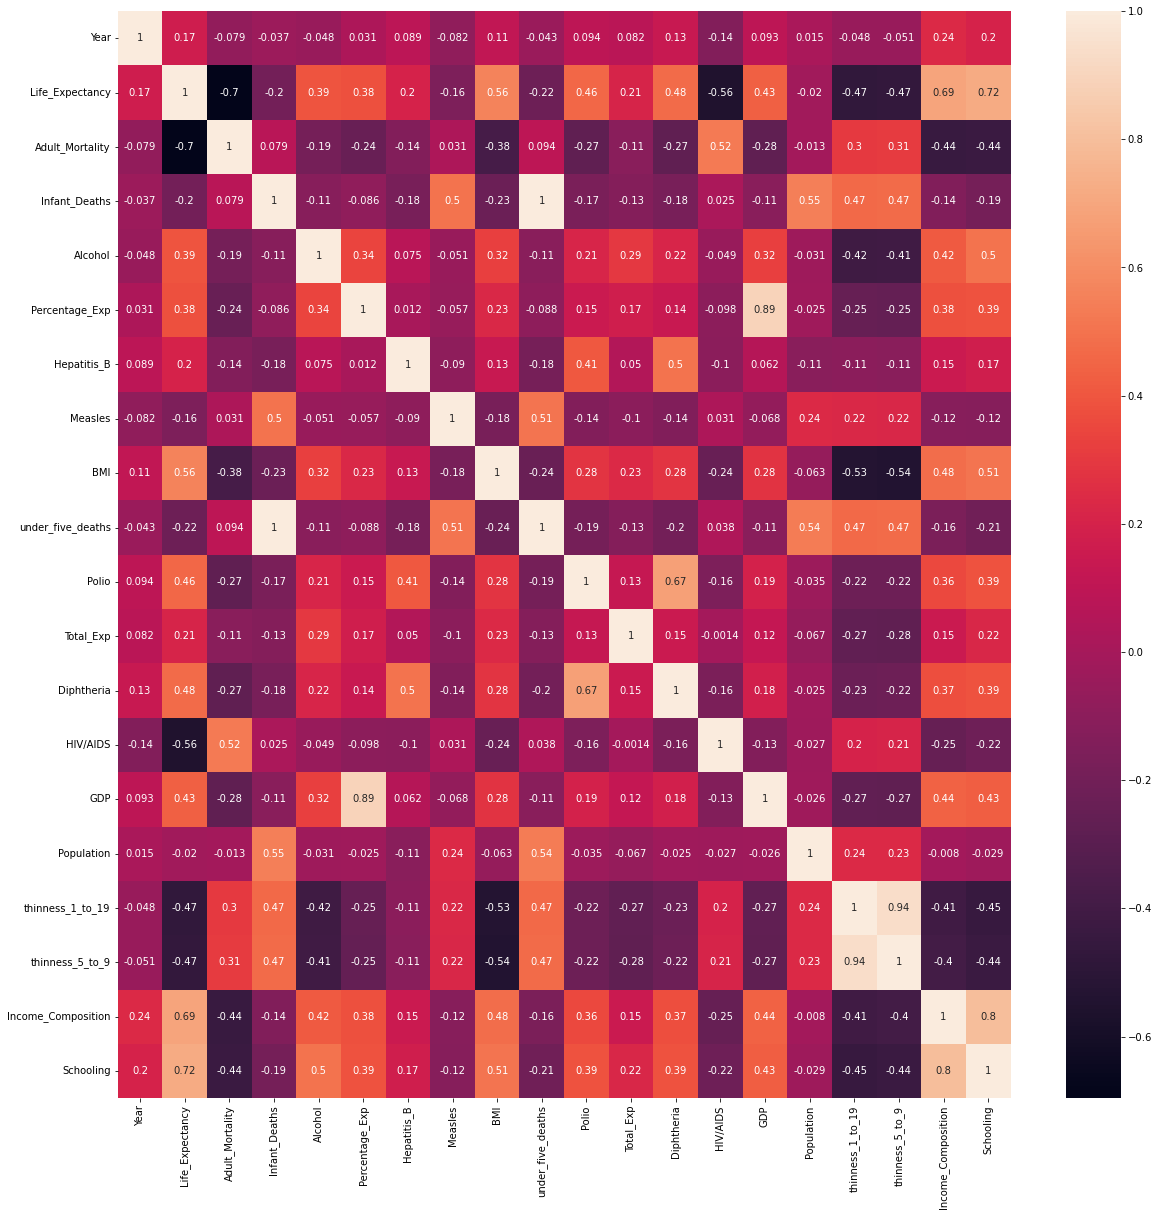

In [11]:
# Correlation Matrix
fig, ax = plt.subplots(figsize = (20,20)) 

corr = lifexp_df.corr() 
sb.heatmap(corr, annot = True)

## <font color='violet'>Dropping unwanted columns</font>

## <font color='violet'>We drop the column 'Country' as it will no longer be needed for running the models. There are too many country names, hence high cardinality and we cannot create one hot vector for this column</font>

## <font color='violet'>Note:Year is also a categorical column but as it is numerical type so it will have some correlation with the target variable so we will not remove it.</font>


In [12]:
lifexp_df.drop('Country',axis = 1, inplace = True)

In [13]:
lifexp_df.drop('Status',axis = 1, inplace = True)

In [14]:
lifexp_df.columns

Index(['Year', 'Life_Expectancy', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Percentage_Exp', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_Exp', 'Diphtheria', 'HIV/AIDS',
       'GDP', 'Population', 'thinness_1_to_19', 'thinness_5_to_9',
       'Income_Composition', 'Schooling'],
      dtype='object')

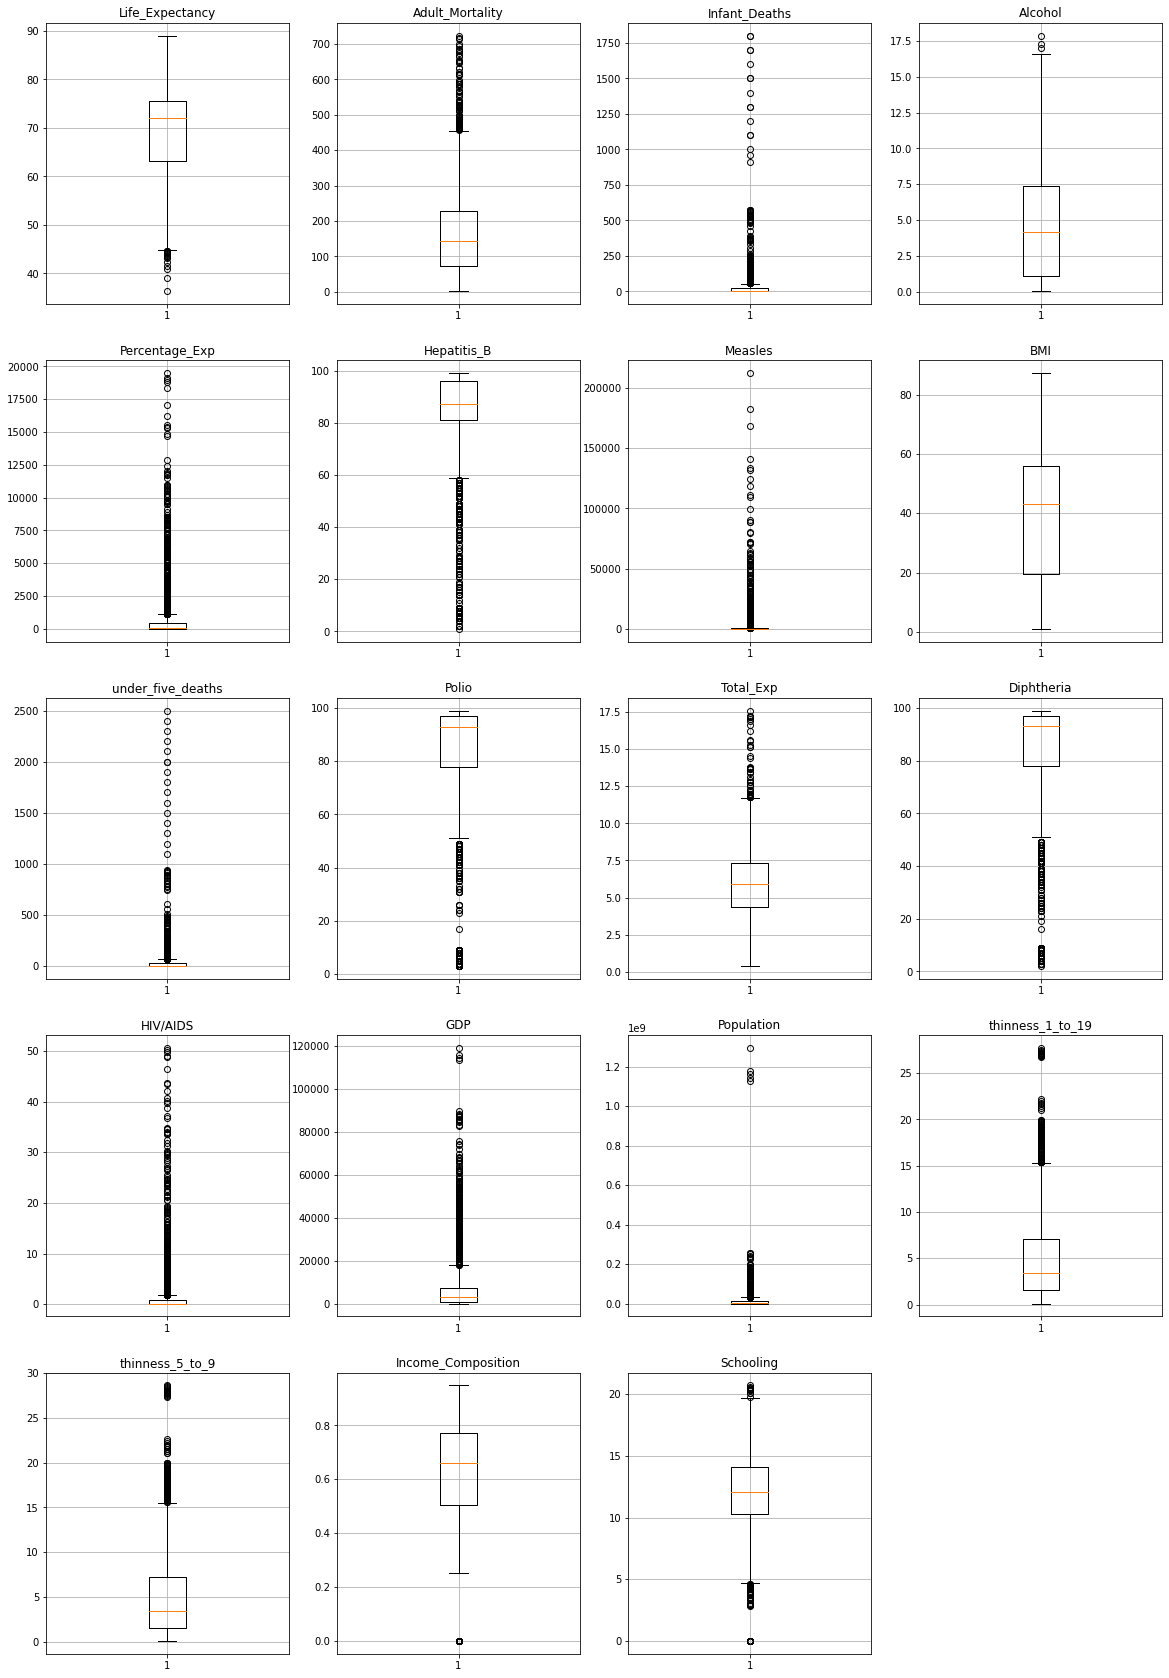

In [15]:
#Features with Outliers 
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'Hepatitis_B':6,'Measles':7,'BMI':8,'under_five_deaths':9,'Polio':10,'Total_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1_to_19':16,'thinness_5_to_9':17,'Income_Composition':18,'Schooling':19}

# Detect outliers in each variable using box plots.
fig = plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(lifexp_df[variable])
                     plt.title(variable)
                     plt.grid(True)

In [16]:
#Features with Outliers 
numcol=['Life_Expectancy','Adult_Mortality','Infant_Deaths','Alcohol','Percentage_Exp','GDP','Hepatitis_B','Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_Exp', 'Diphtheria', 'HIV/AIDS','thinness_1_to_19', 'thinness_5_to_9','Income_Composition', 'Schooling']
for column in numcol:
    if lifexp_df[column].quantile(.9973)<lifexp_df[column].max():
        print(column)
        print('99th Percentile',lifexp_df[column].quantile(.9973))
        print('Max',lifexp_df[column].max())
        print('Outliers Present in Column {}'.format(column))
        print('')
    elif lifexp_df[column].quantile(0)>lifexp_df[column].min():
        print(column)
        print('99th Percentile',lifexp_df[column].quantile(.9973))
        print('Min',lifexp_df[column].min())
        print('Outliers Present in Column {}'.format(column))
        print('')
    else:
        pass

Adult_Mortality
99th Percentile 675.2803999999978
Max 723.0
Outliers Present in Column Adult_Mortality

Infant_Deaths
99th Percentile 1307.0099999999456
Max 1800
Outliers Present in Column Infant_Deaths

Alcohol
99th Percentile 15.074906999999962
Max 17.87
Outliers Present in Column Alcohol

Percentage_Exp
99th Percentile 15357.426040963908
Max 19479.91161
Outliers Present in Column Percentage_Exp

GDP
99th Percentile 86908.37421335556
Max 119172.7418
Outliers Present in Column GDP

Measles
99th Percentile 111472.72849999576
Max 212183
Outliers Present in Column Measles

BMI
99th Percentile 76.72803999999978
Max 87.3
Outliers Present in Column BMI

under_five_deaths
99th Percentile 1807.0099999999456
Max 2500
Outliers Present in Column under_five_deaths

Total_Exp
99th Percentile 16.228740999999776
Max 17.6
Outliers Present in Column Total_Exp

HIV/AIDS
99th Percentile 42.19813999999924
Max 50.6
Outliers Present in Column HIV/AIDS

thinness_1_to_19
99th Percentile 27.007009999999944
Ma

### <font color='green'>Generate the heat map for correlation coefficients and make a list of the columns which are highly correlation except target columns.
### <font color='green'>Draw the box plot for each above features and calculate the 99th percentile and max values for them.</font>
### <font color='green'>And for these highly correlated features remove the feature which has the highest difference between them.</font>

Inference from the outlier & correlation chart:

The following features are highly correlated:
1. Under 5 deaths <---> Infant Deaths. Hence we will remove the feature under 5 deaths
2. Thinness 5-9   <---> Thinness 1-19. Hence we will remove the Thinness 5-9
3. GDP   <---> Percentage expenditure. Hence we will remove the GDP
4. Schooling   <--->Income composition of resources. Hence we will remove the schooling 


In [17]:
lifexp_df.drop(columns=['under_five_deaths','thinness_5_to_9','GDP','Schooling'],axis =1, inplace=True)

## REGRESSION TASK

### <font color='green'>Separete out the features as "X" and target feature as "y"</font>

In [18]:
#Life_Expectancy is the target feature y. X is the featureset.
X = lifexp_df.drop(['Life_Expectancy'],axis =1)
y = lifexp_df['Life_Expectancy']

### <font color='green'>importing the required libraries</font>
### <font color='green'>Splitting the dataset into training and testing data</font>

In [19]:
#Split the data into Train and Test set; set it to 0.3 to explore this parameter 
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### <font color='green'>#Scaling the dataset.We are using the MinMax Scaler for our dataset to bring all values within the range 0-1.</font>

In [20]:
#Scaling the dataset.We are using the MinMax Scaler for our dataset to bring all values within the range 0-1.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [21]:
pd.DataFrame(X_train).head()

0         1         2         3         4         5         6   \
0  0.266667  0.308864  0.004444  0.000000  0.000257  0.813819  0.023748   
1  0.866667  0.264543  0.000000  0.000000  0.010301  0.979381  0.000000   
2  0.933333  0.009695  0.000000  0.265018  0.022010  0.989691  0.000000   
3  0.333333  0.527701  0.051111  0.296231  0.005041  0.813819  0.001216   
4  0.466667  0.131579  0.158333  0.227915  0.016051  0.927835  0.513816   

         7         8         9         10        11        12        13  \
0  0.261877  0.677083  0.256669  0.051546  0.023762  0.000291  0.032609   
1  0.327926  0.979167  0.556609  0.979381  0.001980  0.000016  0.202899   
2  0.651217  0.989583  0.326615  0.989691  0.000000  0.000245  0.039855   
3  0.193511  0.375000  0.221103  0.371134  0.049505  0.016574  0.032609   
4  0.286211  0.947917  0.234143  0.938144  0.000000  0.001117  0.166667   

         14  
0  0.475738  
1  0.589662  
2  0.802743  
3  0.449367  
4  0.695148

In [22]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape:  (2056, 15)
y_train shape:  (2056,)
X_test shape:  (882, 15)
y_test shape (882,)


### <font color='green'> MODELS and MODEL EVALUTATION</font>

### LINEAR REGRESSION


### <font color='green'>As we can see below that accuracy score==>score() can be calcualted for both the training and testing data points and as we know that generally R2_score is calculated for testing data points so score of testing data points=R2_score of testing data points and also the R2_score can be calculated for training data points also</font>

In [23]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Train Score: {:.4f}'.format(lreg.score(X_train, y_train)))
print('Test Score:{:.4f}'.format(lreg.score(X_test, y_test)))

Train Score: 0.7944
Test Score:0.7807


In [24]:
from sklearn import metrics

ylinear_predicted = lreg.predict(X_test)

print('MSE_LR:', metrics.mean_squared_error(y_test,ylinear_predicted))
print('R2_score_LR: {:.4f}'.format(metrics.r2_score(y_test,ylinear_predicted)))

MSE_LR: 19.564623619792908
R2_score_LR: 0.7807


#### Decision tree Regression

In [26]:
from sklearn.tree import DecisionTreeRegressor
reg_DR=DecisionTreeRegressor(max_depth=6)
reg_DR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [27]:
reg_DR.feature_importances_

array([4.58152869e-03, 2.29689247e-01, 6.77270261e-03, 6.10250115e-03,
       0.00000000e+00, 1.40118380e-04, 2.59565650e-03, 2.86765389e-02,
       1.39554539e-03, 2.58542752e-04, 2.58118457e-04, 6.20683201e-01,
       0.00000000e+00, 8.64525302e-03, 9.02010467e-02])

In [28]:
pd.Series(reg_DR.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

HIV/AIDS              0.620683
Adult_Mortality       0.229689
Income_Composition    0.090201
BMI                   0.028677
thinness_1_to_19      0.008645
dtype: float64

In [29]:
y_pred_DR = reg_DR.predict(X_test)

In [30]:
y_pred_DR

array([76.63      , 67.40909091, 54.71      , 58.32333333, 53.10350877,
       65.11086957, 71.6839437 , 78.58064516, 73.4807571 , 52.8925    ,
       65.1452381 , 82.76730769, 73.4807571 , 77.41337209, 62.632     ,
       75.05136986, 57.4125    , 64.39642857, 72.3173913 , 82.76730769,
       73.4807571 , 73.4807571 , 73.4807571 , 81.34411765, 71.6839437 ,
       58.80952381, 82.76730769, 71.6839437 , 73.4807571 , 73.4807571 ,
       75.05136986, 58.32333333, 77.41337209, 73.4807571 , 75.05136986,
       73.4807571 , 73.765625  , 82.76730769, 59.76846847, 73.4807571 ,
       59.76846847, 77.41337209, 78.58064516, 73.4807571 , 73.4807571 ,
       77.41337209, 54.55789474, 73.4807571 , 53.10350877, 73.65757576,
       75.05136986, 52.64444444, 73.765625  , 72.3173913 , 71.28387097,
       71.6839437 , 81.34411765, 73.4807571 , 53.10350877, 73.4807571 ,
       67.40909091, 73.65757576, 77.41337209, 73.4807571 , 59.76846847,
       73.4807571 , 65.1452381 , 73.4807571 , 47.27142857, 77.41

In [31]:
reg_DR.score(X_test,y_test)

0.8973802121881027

In [45]:
metrics.r2_score(y_test,y_pred_DR)

0.8973802121881027

In [32]:
from sklearn.metrics import mean_squared_error
mse_DR=mean_squared_error(y_test,y_pred_DR)
rmse_DR=np.sqrt(mse_DR)
rmse_DR

3.026050841323767

#### SVM Regression

In [33]:
from sklearn.svm import SVR

In [34]:
SVRModel=SVR()

In [35]:
SVRModel.fit(X_train,y_train)

SVR()

In [36]:
y_pred_SVR=SVRModel.predict(X_test)

In [37]:
y_pred_SVR

array([76.94160905, 66.845243  , 51.1753456 , 67.30847763, 57.84564592,
       59.53345963, 71.74874306, 80.13892127, 73.04714997, 51.25103293,
       67.63630819, 81.0307314 , 72.57848294, 75.37298844, 61.34771696,
       73.92287105, 58.59057547, 66.77438174, 71.41525255, 80.34472467,
       70.48970582, 75.15114585, 74.92217945, 79.42818124, 67.32404201,
       57.44904301, 80.65757555, 71.51461548, 71.32759397, 71.22953582,
       76.72741958, 56.78822629, 73.76918045, 76.02543339, 76.45784757,
       72.09102579, 73.94096907, 81.55752444, 61.99934229, 71.6405555 ,
       63.87190635, 74.92813658, 79.12916515, 72.98777248, 73.19152639,
       78.36619564, 59.29856253, 73.46980405, 53.63303231, 73.0956191 ,
       74.56481968, 63.55632954, 75.46031298, 69.75147913, 65.18720475,
       70.47081699, 78.95446324, 73.36505899, 58.13215134, 70.88134664,
       68.51940084, 71.29862818, 73.63170208, 67.77977864, 58.55435668,
       75.35771088, 71.68477654, 72.87950545, 63.39172446, 75.38

In [38]:
SVRModel.score(X_test,y_test)

0.825513363397167

In [44]:
metrics.r2_score(y_test,y_pred_SVR)

0.825513363397167

In [39]:

from sklearn.metrics import mean_squared_error
mse_svr=mean_squared_error(y_test,y_pred_DR)
rmse_svr=np.sqrt(mse_svr)
rmse_svr

3.026050841323767

In [41]:
# LR- linear regression, DTR- Decision tree regression, SVR- Sipport vector regression
import pandas as pd

Parameters = {'RMSE': [19.5,3.02,3.02],'R2': [0.7,0.89,0.85]}

df = pd.DataFrame(Parameters, columns = ['RMSE','R2'], index=['LR','DTR','SVR'])

print (df)

      RMSE    R2
LR   19.50  0.70
DTR   3.02  0.89
SVR   3.02  0.85


# Highest value of R squared & lowest value of mean sqaured error is found  for the Decsison/
# tree regression model.

## <font color='green'>Conclusion: 1. R2_score(y_test,y_test_predicted) and score(X_test,y_test) are same</font>

## <font color='green'>For ideal regression model R2 score/score(for test) should be high and MSE should be low</font>